# Introduction to Modeling with Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline

## Importing Data

In [2]:
df1_training = pd.read_csv('/Users/kaydenfinlayson/Desktop/Python_HW_2/house_prices/train.csv')
df1_test = pd.read_csv('/Users/kaydenfinlayson/Desktop/Python_HW_2/house_prices/test.csv')
y = df1_training.SalePrice
#To clear the error below I could use df1_training = df1_training.drop("SalePrice",axis = 1), but I want to keep sales price around
df1_all= pd.concat([df1_training, df1_test])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
df1_all.head()
print(df1_test.shape)
print(df1_training.shape)
print(df1_all.shape)

(1459, 80)
(1460, 81)
(2919, 81)


## Cleaning Data

### SF Data Description

LotArea: Lot size in square feet	

BsmtUnfSF: Unfinished square feet of basement area

Total SF: TotalBsmtSF: Total square feet of basement area + 1stFlrSF: First Floor square feet + 2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

### Ordinal Data Description

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
	
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only	

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel


### Nominal Data Description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
			
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

### Binary Data Description

CentralAir: Central air conditioning

       N	No
       Y	Yes
       

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved


### Other (Numeric) Data Description

TotalFullBath: BsmtFullBath: Basement full bathrooms + FullBath: Full bathrooms above grade

TotalHalfBath:  BsmtHalfBath: Basement half bathrooms + HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does not include basement bedrooms)

Kitchen: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
		
Fireplaces: Number of fireplaces
				
GarageCars: Size of garage in car capacity
							
MiscVal: $Value of miscellaneous feature

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

## Combining Data and Deleting Duplicates

### Total SF
- TotalBsmtSF: Total square feet of basement area

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

In [4]:
df1_all['TotalSF'] = df1_all['1stFlrSF'] + df1_all['2ndFlrSF'] + df1_all['TotalBsmtSF']

In [5]:
del df1_all ['GrLivArea']
del df1_all ['TotalBsmtSF']
del df1_all ['1stFlrSF']
del df1_all ['2ndFlrSF']

### Total Bathroom

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

In [6]:
df1_all['TotalBath'] = df1_all['FullBath'] + df1_all['BsmtFullBath']
df1_all['TotalHalfBath'] = df1_all['HalfBath'] + df1_all['BsmtHalfBath']

In [7]:
del df1_all ['BsmtFullBath']
del df1_all ['BsmtHalfBath']
del df1_all ['FullBath']
del df1_all ['HalfBath']

Lot Frontage = Lot Area

In [8]:
del df1_all ['LotFrontage']

### Finished SF

BsmtFinSF1: Type 1 finished square feet + BsmtFinSF2: Type 2 finished square feet = BsmtUnfSF: Unfinished square feet of basement area

In [9]:
del df1_all ['BsmtFinSF1']
del df1_all ['BsmtFinSF2']

### Basement

- BsmtUnfSF: Unfinished square feet of basement area
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinType2: Rating of basement finished area (if multiple types)

In [10]:
del df1_all ['BsmtExposure']
del df1_all ['BsmtFinType1']
del df1_all ['BsmtFinType2']
del df1_all ['BsmtCond']


### Garage

- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- GarageFinish: Interior finish of the garage
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity

In [11]:
del df1_all ['GarageCond']
del df1_all ['GarageType']
del df1_all ['GarageYrBlt']
del df1_all ['GarageFinish']
del df1_all ['GarageQual']
del df1_all ['GarageArea']

### Other

The following variables will be removed to simplify the model.  One hot encoding won't run on my computer when I try and run it on more than a few columns.  

In [12]:
del df1_all ['MasVnrType']
del df1_all ['MasVnrArea']

In [13]:
df1_all.shape

(2919, 61)

### Missing Values

In [14]:
df1_all.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
BsmtQual           81
MSZoning            4
TotalHalfBath       2
TotalBath           2
Functional          2
Utilities           2
GarageCars          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
Electrical          1
SaleType            1
TotalSF             1
BsmtUnfSF           1
EnclosedPorch       0
BldgType            0
Id                  0
HouseStyle          0
HeatingQC           0
Heating             0
BedroomAbvGr        0
CentralAir          0
KitchenAbvGr        0
Foundation          0
Fireplaces          0
Condition1          0
Condition2          0
ExterQual           0
ExterCond           0
LotConfig           0
LandContour         0
PoolArea            0
YrSold              0
YearRemodAdd        0
dtype: int64

The following columns are not observed enough in the data to be useful.

In [15]:
del df1_all ['PoolQC']
del df1_all ['MiscFeature']
del df1_all ['Alley']
del df1_all ['Fence']
del df1_all ['FireplaceQu']

In [16]:
#df1_all[''] = df1_all[''].fillna(0)

In [17]:
df1_all = df1_all.drop(df1_all.loc[df1_all['MSZoning'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['TotalHalfBath'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['TotalBath'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['Functional'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['BsmtUnfSF'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['KitchenQual'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['GarageCars'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['TotalSF'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['Exterior1st'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['Electrical'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['Utilities'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['Exterior2nd'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['BsmtQual'].isnull()].index)
df1_all = df1_all.drop(df1_all.loc[df1_all['SaleType'].isnull()].index)

In [18]:
df1_all.isnull().sum().sort_values(ascending=False).head(5)

SalePrice        1370
TotalHalfBath       0
Exterior2nd         0
LandContour         0
KitchenQual         0
dtype: int64

In [19]:
df1_all.shape

(2741, 56)

## Feature Engineering

### Ordinal

- ExterQual: Evaluates the quality of the material on the exterior
- ExterCond: Evaluates the present condition of the material on the exterior
- BsmtQual: Evaluates the height of the basement
- HeatingQC: Heating quality and condition
- KitchenQual: Kitchen quality
- Functional: Home functionality (Assume typical unless deductions are warranted)

In [20]:
z = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1}
df1_all["ExterQual"] = df1_all["ExterQual"].map(z)
df1_all["ExterCond"] = df1_all["ExterCond"].map(z) 
df1_all["KitchenQual"] = df1_all["KitchenQual"].map(z) 
df1_all["BsmtQual"] = df1_all["BsmtQual"].map(z) 
df1_all["HeatingQC"] = df1_all["HeatingQC"].map(z)

In [21]:
z = {"Typ" : 3, "Min1" : 3, "Min2" : 3, "Mod" : 2, "Maj1": 2, "Maj2" : 2, "Sev" : 1, "Sal" : 1}
df1_all["Functional"] = df1_all["Functional"].map(z)

In [22]:
df1_all["HeatingQC"].value_counts()

5    1431
3     785
4     444
2      79
1       2
Name: HeatingQC, dtype: int64

In [23]:
z = {"Y" : 2, "P" : 1, "N" : 0}
df1_all["PavedDrive"] = df1_all["PavedDrive"].map(z)

In [24]:
df1_all.shape

(2741, 56)

### Binary

In [25]:
df1_all["CentralAir"].value_counts()

Y    2584
N     157
Name: CentralAir, dtype: int64

In [26]:
z = {"Y": 1, "N": 0}
df1_all["CentralAir"] = df1_all["CentralAir"].map(z)

In [27]:
df1_all["CentralAir"].value_counts()

1    2584
0     157
Name: CentralAir, dtype: int64

In [28]:
df1_all["Street"].value_counts()

Pave    2730
Grvl      11
Name: Street, dtype: int64

In [29]:
z = {"Grvl": 1, "Pave": 0}
df1_all["Street"] = df1_all["Street"].map(z)

In [30]:
df1_all["Street"].value_counts()

0    2730
1      11
Name: Street, dtype: int64

In [31]:
df1_all.shape

(2741, 56)

### Nominal

In [32]:
df2_all = df1_all.select_dtypes(include=[object])
df2_all.head()

,BldgType,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Foundation,Heating,HouseStyle,LandContour,LandSlope,LotConfig,LotShape,MSZoning,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType,Utilities
0,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,GasA,2Story,Lvl,Gtl,Inside,Reg,RL,CollgCr,CompShg,Gable,Normal,WD,AllPub
1,1Fam,Feedr,Norm,SBrkr,MetalSd,MetalSd,CBlock,GasA,1Story,Lvl,Gtl,FR2,Reg,RL,Veenker,CompShg,Gable,Normal,WD,AllPub
2,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,GasA,2Story,Lvl,Gtl,Inside,IR1,RL,CollgCr,CompShg,Gable,Normal,WD,AllPub
3,1Fam,Norm,Norm,SBrkr,Wd Sdng,Wd Shng,BrkTil,GasA,2Story,Lvl,Gtl,Corner,IR1,RL,Crawfor,CompShg,Gable,Abnorml,WD,AllPub
4,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,GasA,2Story,Lvl,Gtl,FR2,IR1,RL,NoRidge,CompShg,Gable,Normal,WD,AllPub


In [33]:
df2_all.shape

(2741, 20)

In [34]:
from sklearn import preprocessing

In [35]:
enc = preprocessing.OneHotEncoder()
enc.fit(df2_all)
onehotlabels = enc.transform(df2_all).toarray()
onehotlabels.shape

(2741, 151)

In [36]:
del df1_all ['BldgType']
del df1_all ['Condition1']
del df1_all ['Condition2']
del df1_all ['Electrical']
del df1_all ['Exterior1st']
del df1_all ['Exterior2nd']
del df1_all ['Foundation']
del df1_all ['Heating']
del df1_all ['HouseStyle']
del df1_all ['LandContour']
del df1_all ['LandSlope']
del df1_all ['LotConfig']
del df1_all ['LotShape']
del df1_all ['MSZoning']
del df1_all ['Neighborhood']
del df1_all ['RoofMatl']
del df1_all ['RoofStyle']
del df1_all ['SaleCondition']
del df1_all ['SaleType']
del df1_all ['Utilities']

In [37]:
df3_all= pd.concat([df1_all,onehotlabels])

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [38]:
df1_all.dtypes

3SsnPorch          int64
BedroomAbvGr       int64
BsmtQual           int64
BsmtUnfSF        float64
CentralAir         int64
EnclosedPorch      int64
ExterCond          int64
ExterQual          int64
Fireplaces         int64
Functional         int64
GarageCars       float64
HeatingQC          int64
Id                 int64
KitchenAbvGr       int64
KitchenQual        int64
LotArea            int64
LowQualFinSF       int64
MSSubClass         int64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PavedDrive         int64
PoolArea           int64
SalePrice        float64
ScreenPorch        int64
Street             int64
TotRmsAbvGrd       int64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
TotalSF          float64
TotalBath        float64
TotalHalfBath    float64
dtype: object

In [39]:
#Onehot encoding in this way added about a hundered thousand rows and I am not sure why.
#one_hot = pd.get_dummies(df1_all["SaleCondition"])
#df1_all = df1_all.drop("SaleCondition", axis = 1)
#df1_all = df1_all.join(one_hot)

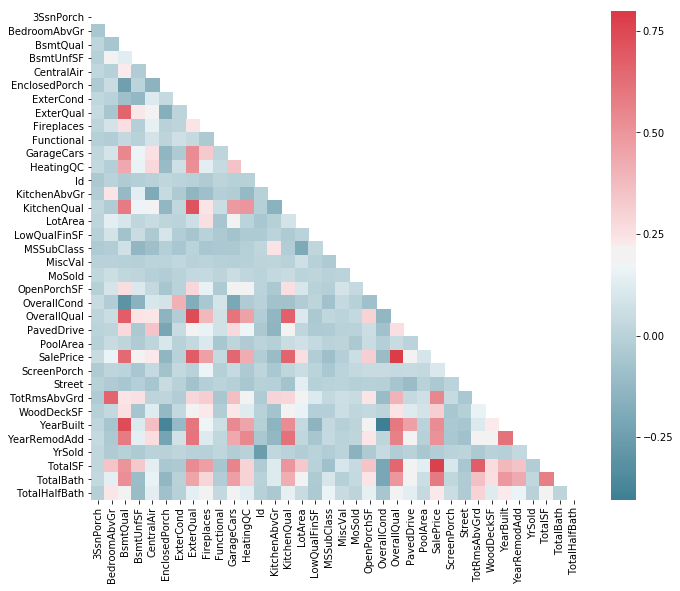

In [40]:
corrmat = df1_all.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.8, square=True)

In [41]:
df_train = df1_all.iloc[:1460]
df_test = df1_all.iloc[1460:]
x_train = df_train.loc[:, ~df_train.columns.isin(["SalePrice"])]
y_train = df_train["SalePrice"]
x_test = df_test

In [42]:
df_train.shape

(1460, 36)

In [43]:
df_test.shape

(1281, 36)

In [44]:
df1_all.shape

(2741, 36)

In [45]:
#Linear regression
from sklearn.linear_model import LinearRegression

Linear = LinearRegression
linear.fit(x_train, y_train)
y_pred_train = linear.predict(x_train)


NameError: name 'linear' is not defined

In [46]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10, weights="distance")
neighbors.fit(x_train, y_train)
y_pred_train = neighbors.predict(x_train)
print("Percent accuracy for KNN on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').